# Investigate and plot model skill as function of spatial resolution 

This notebook explores the relationship between model skill and spatial resolution and plots Figure 1 of the paper. First load the necessary modules, including specific functions in utility.py. (For that append the location of utility.py to sys.path)

In [1]:
import sys, os
#change path to path of current skript, where also utility.py lies
sys.path.append('C:/Users/F80840370/projects/scClim/climada/scClim/subproj_D/papers/NHESS/code_and_data/')

import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib 
import colorcet as cc
from utility import data_dir, read_at_centroid_data, compute_verification_stats, en_names

Select hazard variable and croptypes, load data.

In [5]:
#%% SETUP
variable='MESHS'
croptypes_lists=[['wheat','maize','barley','rapeseed'],['wheat'],['maize'],['rapeseed'],['barley'],['grapevine']]#,['wheat'],['maize'],['barley'],['rapeseed'],['Aepfel'],['grapevine']]
datadir = f"{data_dir}/data_at_centroid/"
figdir = 'C:/Users/F80840370/projects/scClim/climada/scClim/subproj_D/papers/NHESS/fig/'
at_centroid_data_crops={}
for croptypes in croptypes_lists:
    at_centroid_data, croptype = read_at_centroid_data(datadir,croptypes,variable=variable)
    at_centroid_data_crops[croptype] = at_centroid_data
 

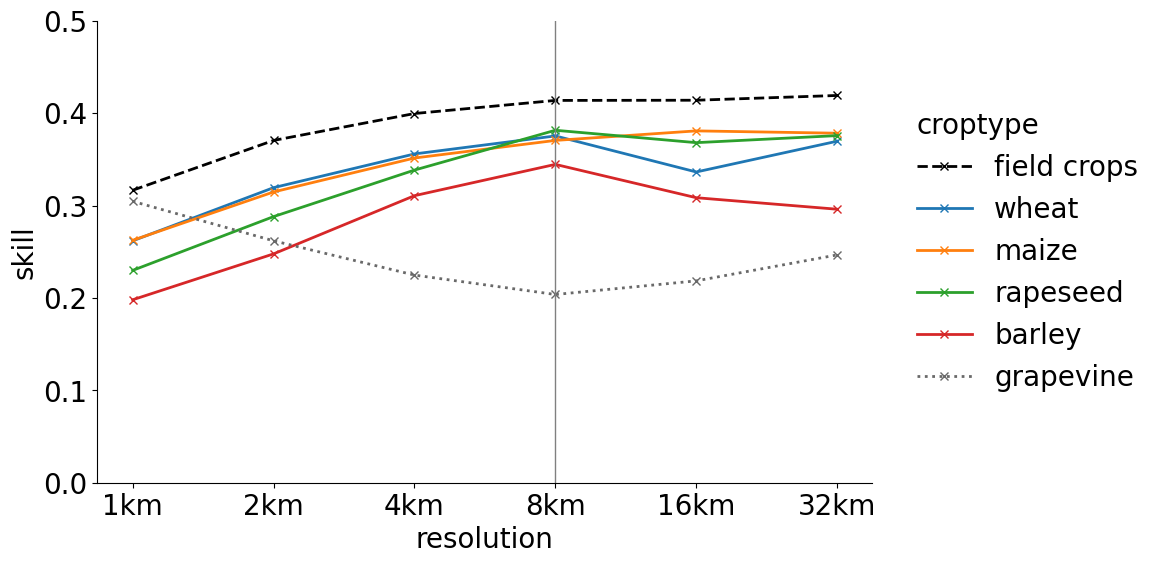

In [7]:
#%% Plot Figure skill as function of resolution
resolutions=['1km','2km','4km','8km', '16km', '32km']
val=20  #MESHS threshold
labels=['a)','b)']
score='HSS'
font_s=16
font_l=20
matplotlib.rcParams.update({'font.size': font_l, 'axes.labelsize':font_l})
    
    
fig,ax=plt.subplots(figsize=(10,6),nrows=1,ncols=1)
data={sc: [] for sc in at_centroid_data_crops.keys()}

#loop over croptypes and plot data
for j,croptype in enumerate(at_centroid_data_crops.keys()):

    n=[] #number of predictions

    #get data for different resolutions for this croptype
    for i,res in enumerate(resolutions):
        df, npred = compute_verification_stats(at_centroid_data_crops[croptype][res],
                                           variable = variable)

        data[croptype].append(df[score][val])
        n.append(npred)

    #plot data
    if croptype in en_names.keys() and en_names[croptype]=='field crops':
        ax.plot(np.arange(0,len(resolutions)),data[croptype],color='k',linestyle='dashed',marker='x',label=en_names[croptype],linewidth=2) #,color='k')
    elif croptype=='grapevine':
        ax.plot(np.arange(0,len(resolutions)),data[croptype],color='dimgrey',linestyle='dotted',marker='x',label=croptype,linewidth=2) #,color='k')
 
    else:
        ax.plot(np.arange(0,len(resolutions)),data[croptype],linestyle='solid',marker='x',label=croptype,linewidth=2) #,color='k')

#format axis
ax.set_xticks(np.arange(0,len(resolutions)))
ax.set_xticklabels(resolutions)                   
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('resolution')
ax.set_ylim([0,0.5])
ax.set_ylabel('skill')
ax.axvline(x=3,linestyle='solid',color='gray',linewidth=1)

#add legend
leg=ax.legend(ncol=1,loc='center', title='croptype',bbox_to_anchor=(1.2,0.5),edgecolor='none')
leg._legend_box.align = "left"
        

In [10]:
fig.savefig(f'{figdir}/Figure_Skill_resolution_{variable}_all_crops_{score}.png',dpi=300,bbox_inches='tight')
fig.savefig(f'{figdir}/Figure_Skill_resolution_{variable}_all_crops_{score}.pdf',dpi=300,bbox_inches='tight')
